# Model Viewer

## Analysis of the Various Models

### Singular or Multiple, All Are Available!

This notebook takes in .npy Observation Viewing Geometry models, either constructed from simulation data or real data. Everything is in the form of incidence, emission, azimuth angles, and the data stored is in I/F.

In [17]:
#CELL 1: READ IN DATA.

import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

#Add more files to load in as you desire. The format for doing so should be self-evident.

finalMatrixHuygens = np.load("Huygens2.00um.npy")
specSim = np.load("SpecularModel2.00um.npy")
lambSim = np.load("LambertianModel2.00um.npy")
finalMatrixLake = np.load("North2.00umLake.npy")
finalMatrixLand = np.load("North2.00umLand.npy")
finalMatrixDunes = np.load("Equator2.00umDunes.npy")
finalMatrixPlains = np.load("Equator2.00umPlains.npy")
finalMatrixHum = np.load("Equator2.00umHummocky.npy")
finalMatrixXanadu = np.load("Equator2.00umXanadu.npy")




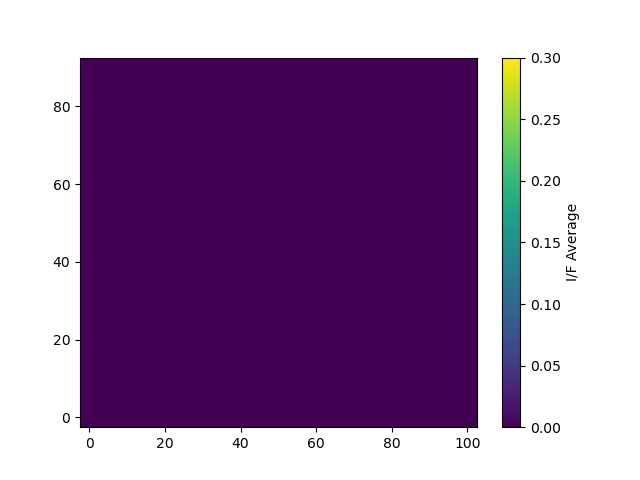

In [18]:
# CELL 2: Display single model, cycling through it in an animation.
%matplotlib ipympl
# Set the model by setting this line here to the one you want to look at:

animMatrix = dataWin1L

X = 21 #incidence
Y = 19 #Emission
Z = 37 #Azimuth

fig, ax = plt.subplots() #matplotlib's axis and figure notation is so annoying and obtuse...

#Now we'd like to try to animate it. 
#https://matplotlib.org/stable/users/explain/animations/animations.html
#Eventually had to use ChatGPT to help here. Could not get the ArtistAnimator to work, but it could
#get the FuncAnimation to work--evidentially defining zz inside the funciton/loop was important.
#Even though I thought I already tried that...

#Now we actually need to get the slices
#Set up x and y divisions.        
xx = np.linspace(0, 100, 21)
yy = np.linspace(0, 90, 19)

#The scale value for how much color detail we want:
cmap = 'viridis'
vmin=0
vmax=0.3

c = ax.pcolor(xx,yy, np.zeros((Y, X)), cmap=cmap,vmin=vmin,vmax=vmax)
fig.colorbar(c, ax=ax, label='I/F Average')
# annoyance of animation: trying to update the color bar duplicates it.
# so we need a "dummy" plot to initialize it before we start animating. 

#Making an array so the title can display the azimuth angle. 
angles = ["000", "005", "010", "015", "020", "025", "030", "035", "040", "045", "050", "055", "060", "065", "070", "075",
             "080", "085", "090", "095", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155",
             "160", "165", "170", "175", "180"] 

def update(frame):
    ax.clear()
    zz = np.zeros((Y, X))
    for x in range(X):
        for y in range(Y):
            zz[y][x] = animMatrix[x][y][frame]
    azimuth = ax.pcolor(xx, yy, zz, cmap=cmap,vmin=vmin,vmax=vmax)
    ax.set(xlim=[-2.5,102.5], ylim=[-2.5,92.5], xlabel='Incidence Angle', ylabel='Emission Angle', 
           title = 'Observation Angle Model. Azimuth: '+str(angles[frame])+ ' degrees')
    

ani = animation.FuncAnimation(fig, update, frames=Z, interval=500)

# To save the animation using Pillow as a gif. Use FFMpegFileWriter for mp4. 
#writer = animation.FFMpegFileWriter(fps = 2)
#ani.save('TEST2.mp4', writer = writer)
#writer = animation.PillowWriter(fps=5)
#ani.save('TEST2.gif', writer=writer)

plt.show()

In [19]:
# CELL 3: Stop the animation. Always do this before re-running cell 2.

ani.pause()
plt.close()

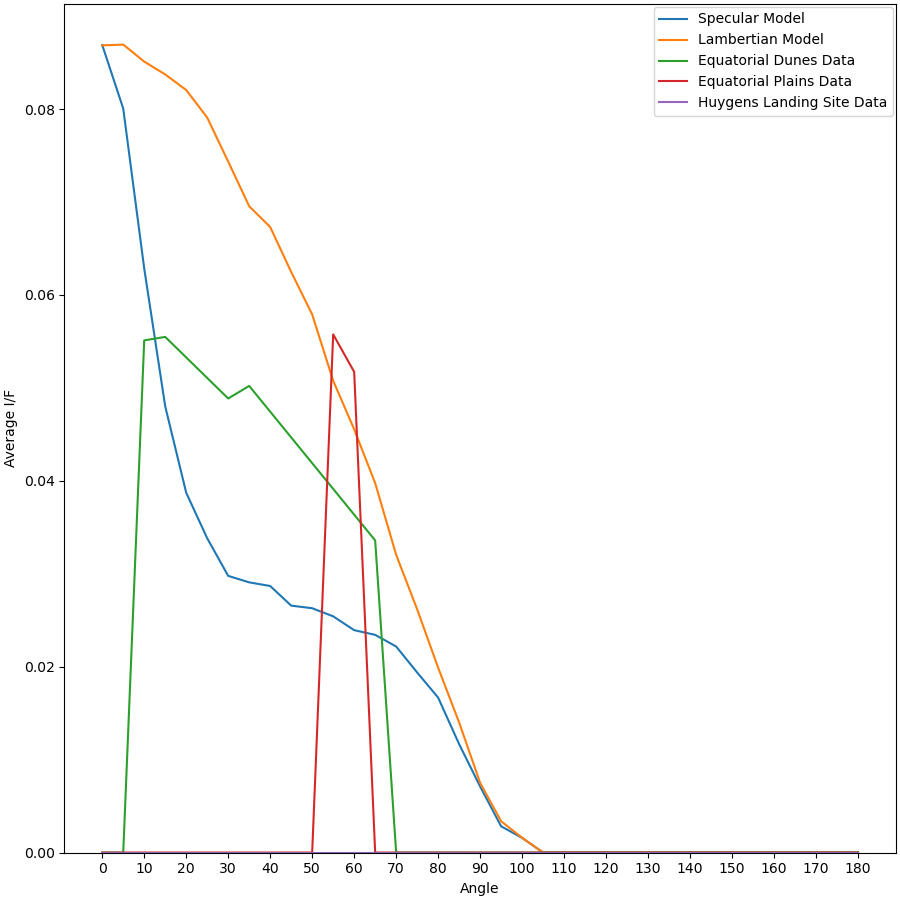

In [13]:
#CELL 4: OMNI DISPLAY: DISPLAYS ALL DATA AT ONCE ADJUSTABLE WITH SLIDERS.
#NOTE: currently, displaying more things has to be hardcoded in. Yes, it sucks. 
#There has to be a way to genrealize it.
%matplotlib ipympl 
#Allows animation and interaction.

plt.close()
import mpl_interactions.ipyplot as iplt
fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

angleSpace = np.linspace(0, 180, 37)
inciSpace = np.linspace(0, 100, 21)
emisSpace = np.linspace(0, 90, 19)
azimSpace = np.linspace(0, 180, 37)
typeSpace = np.linspace(1,3,3)

def SM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(specSim[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(specSim[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(specSim[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LM(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(lambSim[i][emis][azim]*8)
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(lambSim[inci][i][azim]*8)
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(lambSim[inci][emis][i]*8)
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LkD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLake[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLake[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLake[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine
def LnD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixLand[i][emis][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixLand[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixLand[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def SpecialD(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHuygens[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHuygens[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHuygens[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eDunes(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixDunes[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixDunes[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixDunes[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def ePlains(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixPlains[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixPlains[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixPlains[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eHumm(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixHumm[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixHumm[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixHumm[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1
    
    return theLine

def eXana(inci,emis,azim,types):
    theLine = []
    inci =int(inci/5)
    emis =int(emis/5)
    azim =int(azim/5)
    types =int(types)

    i = 0
    if (types == 1):
        while (i < 21):
            theLine.append(finalMatrixXanadu[i][emis][azim]) #No need to multiply by 8 as this was calculated without other wavelenghts. Yes, an original code oversight.
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 2):
        while (i < 19):
            theLine.append(finalMatrixXanadu[inci][i][azim])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1
    if (types == 3):
        while (i < 37):
            theLine.append(finalMatrixXanadu[inci][emis][i])
            if(theLine[i] <0): theLine[i] = 0
            i=i+1

    while (i < 37):
        theLine.append(0.)
        i=i+1

    return theLine

angleLabels = [0, 10, 20, 30, 40, 50, 60, 70,
             80, 90, 100, 110, 120, 130, 140, 150,
             160, 170, 180] 

ticker = [0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]

controls = iplt.plot(SM, inci=inciSpace, emis=emisSpace, azim=azimSpace, types=typeSpace, ax = ax, label="Specular Model")
iplt.plot(LM, controls=controls, ax = ax, label="Lambertian Model")
#iplt.plot(LkD, controls=controls, ax = ax, label="North Pole Lake Data")
#iplt.plot(LnD, controls=controls, ax = ax, label="North Pole Land Data")
iplt.plot(eDunes, controls=controls, ax = ax, label="Equatorial Dunes Data")
iplt.plot(ePlains, controls=controls, ax = ax, label="Equatorial Plains Data")
#iplt.plot(eHumm, controls=controls, ax = ax, label="Equatorial Hummocky Data")
#iplt.plot(eXana, controls=controls, ax = ax, label="Equatorial Xanadu Data")
#iplt.plot(SpecialD2, controls=controls, ax = ax, label="New 2um Specular Model (Haze 2)")
iplt.plot(SpecialD, controls=controls, ax = ax, label="Huygens Landing Site Data")
#iplt.plot(HMR, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced)")
#iplt.plot(HMR2, controls=controls, ax = ax, label="Huygens Landing Site Data (Reduced2)")
ax.set(ylim = 0.0,xlabel = "Angle", ylabel = "Average I/F", xticks = ticker, xticklabels = angleLabels)
fig.legend()
#plt.savefig("TitanColorSchemes.tif", format="tif", bbox_inches='tight')

plt.show()

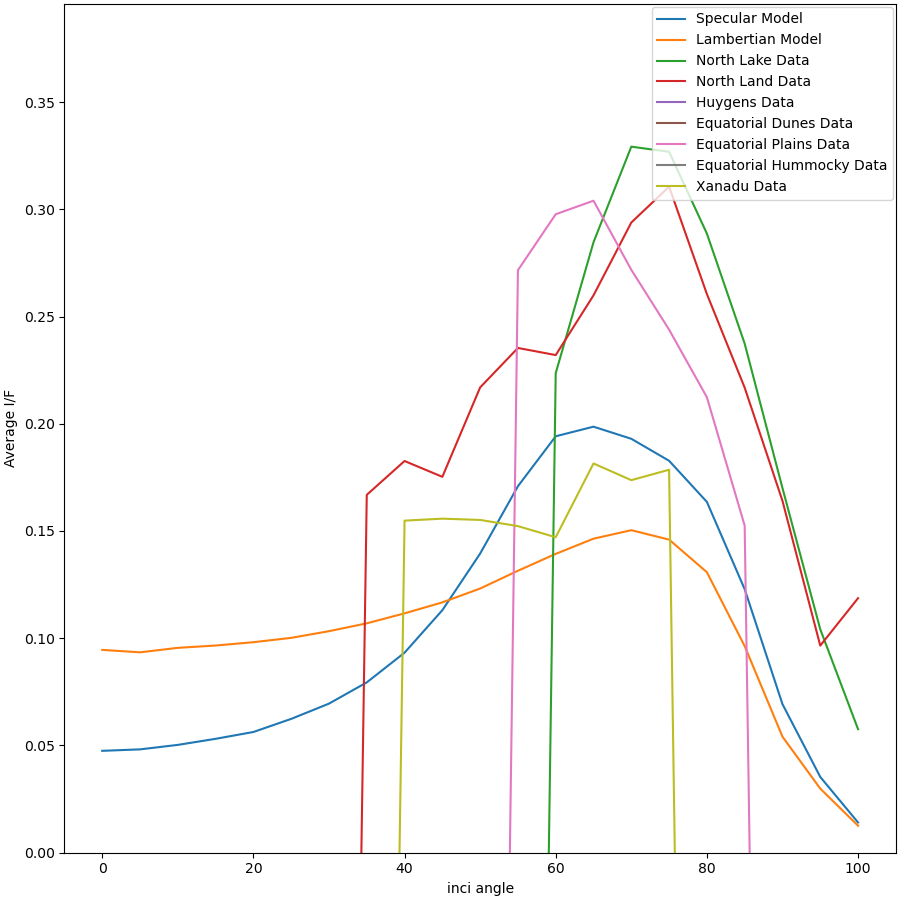

In [14]:
#CELL 5: Printing a single image rather than having to move the sliders. Generally used for printing out the images at the end.

plt.close()
# Getting a Sliced Line through the thing...
sline = "inci" # "inci" "emis" "azim" choose which variable to slice through.
inci = 11 #incidence, 13=65 degrees. This is the index that increments every 5 degrees.
emis = 12 #emission, 12=60 degrees. This is the index that increments every 5 degrees.
azim = 1 #azimuth, 36=180 degrees. This is the index that increments every 5 degrees.

#The variable being sliced through will not be used. 

#Declare Models Here.
specModel = []
lambModel = []
lakeData = []
landData = []
huygensData = []
dunesData = []
plainsData = []
hummData = []
xanaData = []
Eangles = []

#Load in 
i = 0
if (sline == "inci"):
    while (i < 21):
        specModel.append(dataWin5[i][emis][azim])
        lambModel.append(dataWin5L[i][emis][azim])
        lakeData.append(finalMatrixLake[i][emis][azim])
        landData.append(finalMatrixLand[i][emis][azim])
        huygensData.append(finalMatrixHuygens[i][emis][azim])
        dunesData.append(finalMatrixDunes[i][emis][azim])
        plainsData.append(finalMatrixPlains[i][emis][azim])
        hummData.append(finalMatrixHum[i][emis][azim])
        xanaData.append(finalMatrixXanadu[i][emis][azim])
        Eangles.append(i*5.)
        i=i+1
if (sline == "emis"):
    while (i < 19):
        specModel.append(dataWin5[inci][i][azim])
        lambModel.append(dataWin5L[inci][i][azim])
        lakeData.append(finalMatrixLake[inci][i][azim])
        landData.append(finalMatrixLand[inci][i][azim])
        huygensData.append(finalMatrixHuygens[inci][i][azim])
        dunesData.append(finalMatrixDunes[inci][i][azim])
        plainsData.append(finalMatrixPlains[inci][i][azim])
        hummData.append(finalMatrixHum[inci][i][azim])
        xanaData.append(finalMatrixXanadu[inci][i][azim])
        Eangles.append(i*5.)
        i=i+1
if (sline == "azim"):
    while (i < 37):
        specModel.append(dataWin5[inci][emis][i])
        lambModel.append(dataWin5L[inci][emis][i])
        lakeData.append(finalMatrixLake[inci][emis][i])
        landData.append(finalMatrixLand[inci][emis][i])
        huygensData.append(finalMatrixHuygens[inci][emis][i])
        dunesData.append(finalMatrixDunes[inci][emis][i])
        plainsData.append(finalMatrixPlains[inci][emis][i])
        hummData.append(finalMatrixHum[inci][emis][i])
        xanaData.append(finalMatrixXanadu[inci][emis][i])
        Eangles.append(i*5.)
        i=i+1

fig, ax = plt.subplots(figsize = (9,9), layout="constrained") #matplotlib's axis and figure notation is so annoying and obtuse...

ax.plot(Eangles, np.array(specModel)*8., label="Specular Model")
ax.plot(Eangles, np.array(lambModel)*8., label="Lambertian Model")
ax.plot(Eangles, np.array(lakeData), label="North Lake Data")
ax.plot(Eangles, np.array(landData), label="North Land Data")
ax.plot(Eangles, np.array(huygensData), label="Huygens Data")
ax.plot(Eangles, np.array(dunesData), label="Equatorial Dunes Data")
ax.plot(Eangles, np.array(plainsData), label="Equatorial Plains Data")
ax.plot(Eangles, np.array(hummData), label="Equatorial Hummocky Data")
ax.plot(Eangles, np.array(xanaData), label="Xanadu Data")
ax.set(xlabel = sline + " angle")
ax.set(ylabel = "Average I/F")
fig.legend()

ax.set(ylim = 0.0)

plt.show()

In [ ]:
#Cell 6: Save the plot you just generated.

#Remember to set the name you want to save it as here:
plt.savefig("FUNKYTEST.pdf", format="pdf")